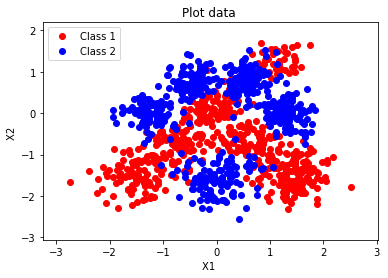

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DataPlot import *
from logisticCode import*
%matplotlib inline

X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

# Question c; visualize the dataset; 
plot_data(X, y)

In [2]:
# Question d; split the dataset into training and test sets
# Pre-processing data
X_train, y_train, X_test, y_test = splitData(X, y)


In [3]:
# Question e; define functions for training
logistic_train = Logistic(X_train, y_train)
weights, record = logistic_train.train(0.001, 100)

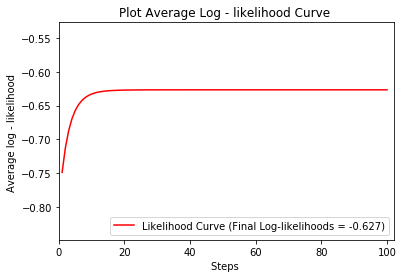

In [4]:
llTrain = logistic_train.logLikelihood(record)

plot_ll(llTrain)

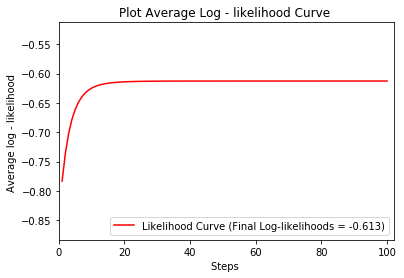

In [5]:
logistic_test = Logistic(X_test, y_test)
llTest = logistic_test.logLikelihood(record)
plot_ll(llTest)

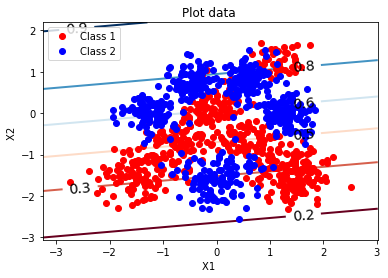

In [6]:
# a predict function

plot_predictive_distribution(X, y, sigmoid, weights)

In [7]:
print(confMatrix(X_test, y_test, weights, 0.5))

[[ 0.69811321  0.30188679]
 [ 0.21276596  0.78723404]]


In [8]:
# Question g: ROC curve

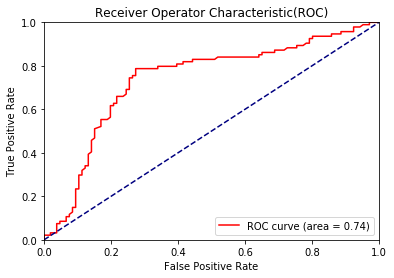

In [9]:
plot_ROC(X_test, y_test, weights)

In [10]:
# Question h; RBFs

In [11]:
def RBF_test(l, learnRate, iterations):
    X_RBF_train = expand_inputs(l, X_train, X_train)
    X_RBF_test = expand_inputs(l, X_test, X_train)

    lo_RBF_train = Logistic(X_RBF_train, y_train)
    weights, record = lo_RBF_train.train(learnRate, iterations)

    ll_RBF_train = lo_RBF_train.logLikelihood(record)
    plot_ll(ll_RBF_train)

    lo_RBF_test = Logistic(X_RBF_test, y_test)
    ll_RBF_test = lo_RBF_test.logLikelihood(record)
    plot_ll(ll_RBF_test)

    plot_predictive_distribution_expand(X, y, sigmoid, expand_inputs, l, X_train, weights)
    print(confMatrix(X_RBF_test, y_test, weights, 0.5))

    plot_ROC(X_RBF_test, y_test, weights)
    #return weights

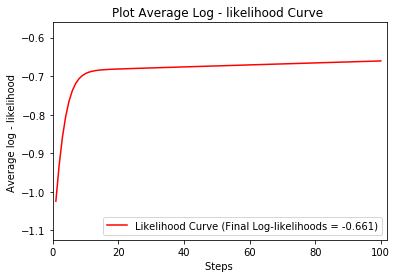

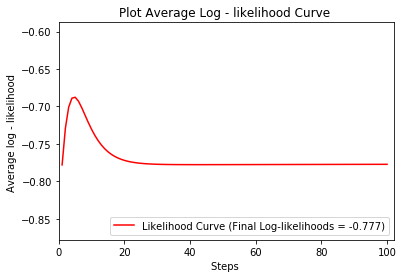

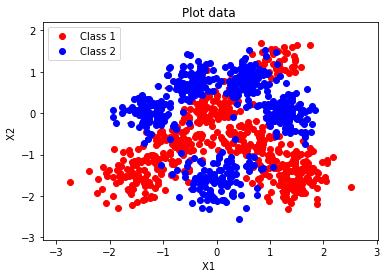

[[ 1.  0.]
 [ 1.  0.]]


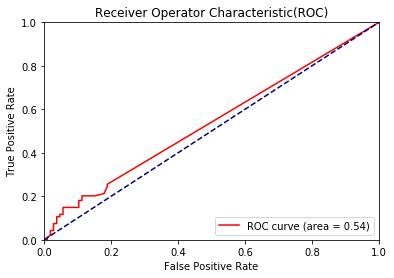

In [12]:
RBF_test(0.01, 0.001, 100)

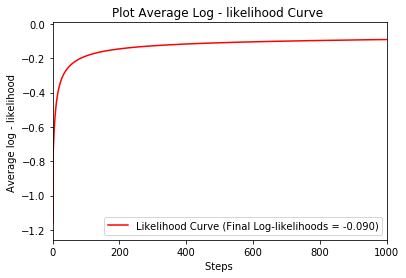

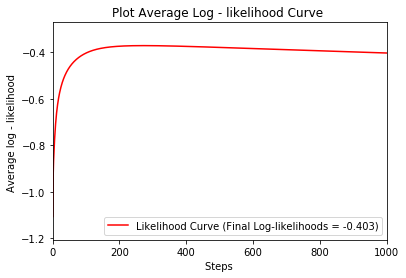

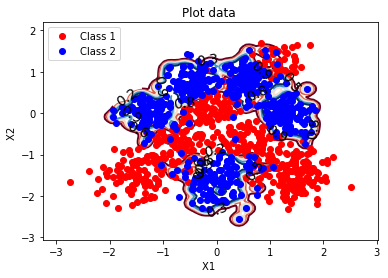

[[ 0.90566038  0.09433962]
 [ 0.19148936  0.80851064]]


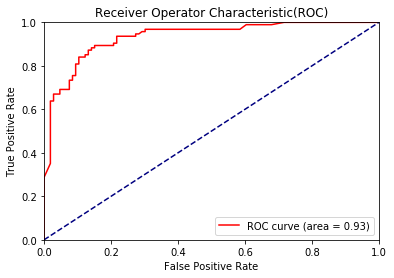

In [13]:
RBF_test(0.1, 0.01, 1000)

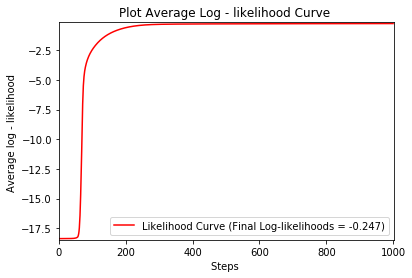

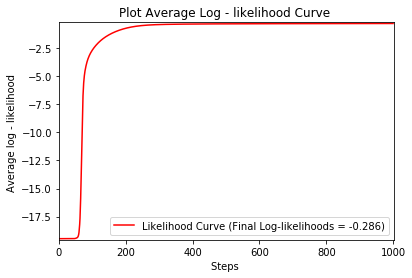

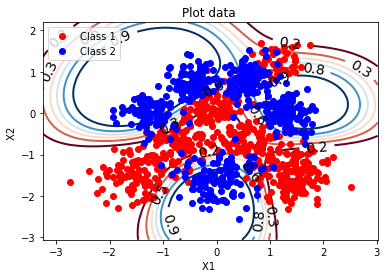

[[ 0.83962264  0.16037736]
 [ 0.06382979  0.93617021]]


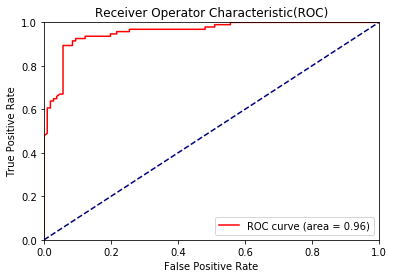

In [14]:
RBF_test(1, 0.0001, 1000)

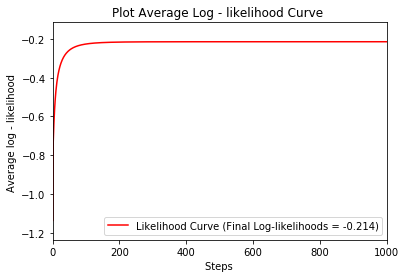

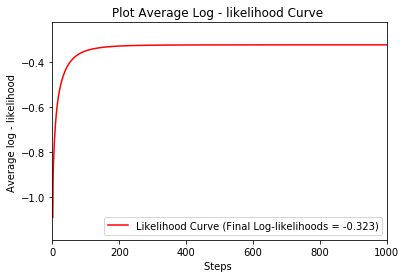

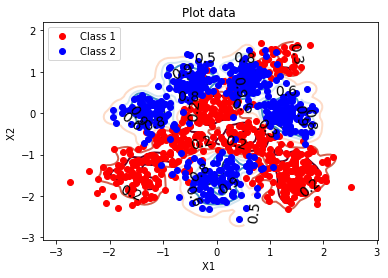

[[ 0.91509434  0.08490566]
 [ 0.11702128  0.88297872]]


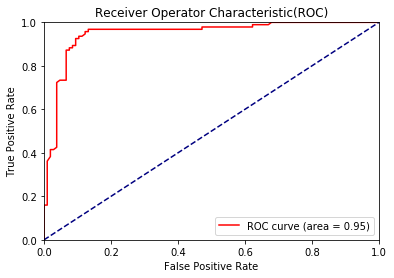

In [15]:
#question j     
def RBF_test_MAP(l, learnRate, iterations):
    X_RBF_train = expand_inputs(l, X_train, X_train)
    X_RBF_test = expand_inputs(l, X_test, X_train)

    lo_RBF_train = Logistic_prior(X_RBF_train, y_train)
    weights, record = lo_RBF_train.train(learnRate, iterations)

    ll_RBF_train = lo_RBF_train.logLikelihood(record)
    plot_ll(ll_RBF_train)

    lo_RBF_test = Logistic_prior(X_RBF_test, y_test)
    ll_RBF_test = lo_RBF_test.logLikelihood(record)
    plot_ll(ll_RBF_test)

    plot_predictive_distribution_expand(X, y, sigmoid, expand_inputs, l, X_train, weights)
    print(confMatrix(X_RBF_test, y_test, weights, 0.5))

    plot_ROC(X_RBF_test, y_test, weights)
    
    
RBF_test_MAP(0.1, 0.01, 1000)

In [16]:
import scipy
from scipy import optimize



X_opt_train = expand_inputs(0.1, X_train, X_train)
X_opt_test = expand_inputs(0.1, X_test, X_train)
y_opt_train = y_train.reshape(-1)
y_opt_test = y_test.reshape(-1)
w0 = np.zeros((X_opt_train.shape[1]+1, 1))


beta_MAP = scipy.optimize.fmin_l_bfgs_b(func, w0, grad, args = (X_opt_train, y_opt_train))[0]
print(confMatrix(X_opt_test, y_opt_test, beta_MAP, 0.5))

[[ 0.93396226  0.06603774]
 [ 0.11702128  0.88297872]]
